In [55]:
import numpy as np
from tqdm.notebook import tqdm
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("featureselection.csv")

In [221]:
df

,Unnamed: 0.1,key_0,Unnamed: 0_x,Date,Fighter_x,Opponent,Closed_Stance,Weight_class_lbs,Is_Winner_x,Method,Prev_3_Stats_Missing,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,TD Avg.:_Style,SLpM:_Style,Sub. Avg.:_Style,TD Acc.:_Style,TD_Acc_x_Avg_SUB_Style,SApM:_Style,Grappling_Threat_Style,Str. Acc.:_Style,TD Def.:_Style,StrDef_vs_Opp_Str_Danger,TDD_vs_Opp_Grappling,Str. Def:_Style,Volume_x_Accuracy_Style,Current_Win_Streak_Comparison,Volume_x_Accuracy_x_KO%_Style,Str_Acc_vs_Opp_Str_Def,TD_Acc_vs_Opp_TD_Def,SLpM_Bin,VolumeAcc_Bin,SApM_Bin,Overall_Stat_Interactions,Str_Danger_vs_Opp_StrDef,Fighter_Grappling_vs_OppTDD,Overall_Stat_Interactions_Fighter,Fighter_KD_x_Layoff,Opponent_KD_x_Layoff,Current_Win_Streak_Bins,Wins_By_KO_%_Bins,StrDef_vs_OppStrDanger_Bin,TDD_vs_Opp_Grappling_Bin,Overall_Stat_Interactions_Bin,Str_Danger_vs_Opp_StrDef_Bin,Fighter_Grappling_vs_OppTDD_Bin,Overall_Stat_Interactions_Fighter_Bin,Overall_Win_%_Bin,Striking_Ratio,Grappling_Ratio,KD_x_Layoff_Relationship,KD_Layoff_Bins,Unnamed: 0_y,Fight Style_x,Ape_Ratio_x,BMI_x,Unnamed: 0,Fighter_y,Fight Style_y,Ape_Ratio_y,BMI_y,Ape_Ratio_Comparison,BMI_Ratio_Comparison,Ape_Ratio_Bins,Fight_Style_Matchup,Fight_Style_Matchup_BJJ_vs_BJJ,Fight_Style_Matchup_BJJ_vs_Balanced/Mid,Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD,Fight_Style_Matchup_BJJ_vs_OffensiveGrappler,Fight_Style_Matchup_Balanced/Mid_vs_BJJ,Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid,Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD,Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler,Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ,Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid,Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD,Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler,Fight_Style_Matchup_OffensiveGrappler_vs_BJJ,Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid,Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD,Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler,Weight_class_lbs_125 lbs.,Weight_class_lbs_135 lbs.,Weight_class_lbs_145 lbs.,Weight_class_lbs_155 lbs.,Weight_class_lbs_170 lbs.,Weight_class_lbs_185 lbs.,Weight_class_lbs_205 lbs.,Weight_class_lbs_265 lbs.,Prev_KD_Absorbed_Ratio_Flip
0,0,0,20.0,2025-07-26,Reinier de Ridder,Robert Whittaker,False,185 lbs.,True,DEC,False,0.0,5.0,-1.0,0.000000,-8.666667,-0.333333,-189.0,1.0,0.333333,-14.0,-6.0,-5.0,2.0,-11.0,-3.0,-1.0,-2.0,-0.019608,0.666667,-0.647059,-0.5,-0.166667,-0.333333,3.0,0.260870,-1.29,0.17,-1.20,-0.15,3.94,0.00,-0.15,1.4,4.0,5.0,1.0,1.00,0.75,0.5,1.000000,0.739130,0.855596,0.417201,0.999999,0.499999,0.908046,0.393238,0.999999,0.582524,0.448979,0.203256,1.154061,0.427184,0.499718,1.000000,0.485432,1.016949,0.209945,0.0,1.0,0.0,1.222726,0.264335,0.238875,0.452593,3.784834,4.948760,2.0,-1.0,0.0,3.0,2.0,1.0,0.0,0.0,2.0,0.570379,1.763225,0.433365,0.0,13.0,BJJ,1.026316,22.518658,0,Robert Whittaker,DangerousStriking/TDD,1.013889,25.090233,0.503046,0.472993,1.0,BJJ_vs_DangerousStriking/TDD,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,1250.0,2024-02-17,Paulo Costa,Robert Whittaker,True,185 lbs.,False,DEC,False,-1.0,-11.0,0.0,-0.333333,40.666667,0.000000,322.0,1.0,0.000000,-9.

In [227]:
df["Date"] = pd.to_datetime(df["Date"])

In [91]:
# #Test ratio flip
# df["Prev_KD_Absorbed_Ratio_Flip"] = 1/df["Prev_KD_Absorbed_Ratio"]

In [341]:
# cols = list(set(['Fighter_Grappling_vs_OppTDD_Bin',
#  'Overall_Stat_Interactions_Bin',
#  'Overall_Stat_Interactions_Fighter_Bin',
#  'Current_Win_Streak_Bins',
#  'Str_Danger_vs_Opp_StrDef',
#  'Striking_Ratio',
#  'Grappling_Ratio',
#  'Prev_KD_Absorbed_Ratio',
#  'Overall_Win_%_Bin',
#  'TDD_vs_Opp_Grappling_Bin',
#  'StrDef_vs_OppStrDanger_Bin',
#  'Ape_Ratio_Bins',
#  'Ape_Ratio_Comparison',
#  'KD_Layoff_Bins',
#  'KD_x_Layoff_Relationship',
#  'Fight_Style_Matchup_BJJ_vs_BJJ',
#  'Fight_Style_Matchup_BJJ_vs_Balanced/Mid',
#  'Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD',
#  'Fight_Style_Matchup_BJJ_vs_OffensiveGrappler',
#  'Fight_Style_Matchup_Balanced/Mid_vs_BJJ',
#  'Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid',
#  'Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD',
#  'Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler',
#  'Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ',
#  'Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid',
#  'Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD',
#  'Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler',
#  'Fight_Style_Matchup_OffensiveGrappler_vs_BJJ',
#  'Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid',
#  'Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD',
#  'Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler',
#  'Weight_class_lbs_125 lbs.',
#  'Weight_class_lbs_135 lbs.',
#  'Weight_class_lbs_145 lbs.',
#  'Weight_class_lbs_155 lbs.',
#  'Weight_class_lbs_170 lbs.',
#  'Weight_class_lbs_185 lbs.',
#  'Weight_class_lbs_205 lbs.',
#  'Weight_class_lbs_265 lbs.',
#  'Fighter_Grappling_vs_OppTDD',
#  'Str_Danger_vs_Opp_StrDef',
#  'TDD_vs_Opp_Grappling',
#  'StrDef_vs_Opp_Str_Danger', "Overall_Win_%_Diff", "TD_Acc_x_Avg_SUB_Style", "Overall_Stat_Interactions", "Overall_Stat_Interactions_Fighter", 'Str. Acc.:_Style', 'SApM:_Style',
#  'TD Acc.:_Style', 'Str. Def:_Style',
#  'Sub. Avg.:_Style', 'SLpM:_Style',
#  'Volume_x_Accuracy_Style', "Prev_KD_Absorbed_Ratio_Flip", "Current_Win_Streak_Comparison", "Current_Win_Streak_Diff", "Overall_Win_%_Diff", "Ape_Ratio_Comparisons"]))

In [399]:
cols = list(set(['Fighter_Grappling_vs_OppTDD_Bin',
 'Overall_Stat_Interactions_Bin',
 'Overall_Stat_Interactions_Fighter_Bin',
 'Current_Win_Streak_Bins',
 'Str_Danger_vs_Opp_StrDef',
 'Striking_Ratio',
 'Grappling_Ratio',
 'Prev_KD_Absorbed_Ratio',
 'Overall_Win_%_Bin',
 'TDD_vs_Opp_Grappling_Bin',
 'StrDef_vs_OppStrDanger_Bin',
 'Ape_Ratio_Bins',
 'Ape_Ratio_Comparison',
 'KD_Layoff_Bins',
 'KD_x_Layoff_Relationship',
 'Fight_Style_Matchup_BJJ_vs_BJJ',
 'Fight_Style_Matchup_BJJ_vs_Balanced/Mid',
 'Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_BJJ_vs_OffensiveGrappler',
 'Fight_Style_Matchup_Balanced/Mid_vs_BJJ',
 'Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid',
 'Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler',
 'Fight_Style_Matchup_OffensiveGrappler_vs_BJJ',
 'Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid',
 'Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler',
 'Weight_class_lbs_125 lbs.',
 'Weight_class_lbs_135 lbs.',
 'Weight_class_lbs_145 lbs.',
 'Weight_class_lbs_155 lbs.',
 'Weight_class_lbs_170 lbs.',
 'Weight_class_lbs_185 lbs.',
 'Weight_class_lbs_205 lbs.',
 'Weight_class_lbs_265 lbs.',
 'Fighter_Grappling_vs_OppTDD',
 'Str_Danger_vs_Opp_StrDef',
 'TDD_vs_Opp_Grappling',
 'StrDef_vs_Opp_Str_Danger', "Overall_Win_%_Diff", "TD_Acc_x_Avg_SUB_Style", "Overall_Stat_Interactions", "Overall_Stat_Interactions_Fighter", 'Str. Acc.:_Style', 'SApM:_Style',
 'TD Acc.:_Style', 'Str. Def:_Style',
 'Sub. Avg.:_Style', 'SLpM:_Style',
 'Volume_x_Accuracy_Style', "Current_Win_Streak_Comparison", "Current_Win_Streak_Diff", "Overall_Win_%_Diff", "SLpM:_Diff", "Str. Acc.:_Diff", "SApM:_Diff","Str. Def:_Diff", "TD Avg.:_Diff", "TD Acc.:_Diff", "TD Def.:_Diff", "Sub. Avg.:_Diff", "Wins_Before_Fight_Diff", "Won_Last_Fight_Diff","Prev_KD_Absorbed_Diff","Prev_STR_Absorbed_Diff","Prev_SUB_Faced_Diff","Days_Since_Last_Fight_Diff", "Is_Winner_x"]))

In [401]:
train

,Weight_class_lbs_205 lbs.,Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler,Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD,Fight_Style_Matchup_BJJ_vs_BJJ,Weight_class_lbs_185 lbs.,Current_Win_Streak_Diff,Weight_class_lbs_170 lbs.,Prev_STR_Absorbed_Diff,Fighter_Grappling_vs_OppTDD,Overall_Stat_Interactions,Str. Def:_Style,Grappling_Ratio,KD_Layoff_Bins,TDD_vs_Opp_Grappling,Str. Acc.:_Style,Ape_Ratio_Comparison,StrDef_vs_Opp_Str_Danger,Overall_Stat_Interactions_Bin,KD_x_Layoff_Relationship,Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD,Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid,Weight_class_lbs_265 lbs.,Fighter_Grappling_vs_OppTDD_Bin,SLpM:_Diff,Weight_class_lbs_145 lbs.,Days_Since_Last_Fight_Diff,Fight_Style_Matchup_BJJ_vs_Balanced/Mid,TD Avg.:_Diff,Overall_Win_%_Diff,Prev_KD_Absorbed_Ratio,Striking_Ratio,Fight_Style_Matchup_Balanced/Mid_vs_BJJ,Volume_x_Accuracy_Style,Fight_Style_Matchup_OffensiveGrappler_vs_BJJ,Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD,Fight_Style_Matchup_BJJ_vs_OffensiveGrappler,Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid,Weight_class_lbs_125 lbs.,StrDef_vs_OppStrDanger_Bin,Overall_Win_%_Bin,SApM:_Style,Current_Win_Streak_Comparison,Wins_Before_Fight_Diff,Won_Last_Fight_Diff,Str. Acc.:_Diff,Weight_class_lbs_135 lbs.,Sub. Avg.:_Style,Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler,SLpM:_Style,Prev_SUB_Faced_Diff,TD Acc.:_Style,Weight_class_lbs_155 lbs.,Current_Win_Streak_Bins,Sub. Avg.:_Diff,Prev_KD_Absorbed_Diff,Overall_Stat_Interactions_Fighter,TD Def.:_Diff,Str. Def:_Diff,Str_Danger_vs_Opp_StrDef,Overall_Stat_Interactions_Fighter_Bin,TDD_vs_Opp_Grappling_Bin,Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ,SApM:_Diff,TD Acc.:_Diff,Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD,Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler,TD_Acc_x_Avg_SUB_Style,Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid,Ape_Ratio_Bins
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,84.0,0.680728,1.268801,0.486956,1.008087,2.0,1.184707,0.516853,0.503401,0.252202,2.0,0.565921,0.0,0.0,0.0,2.0,0.00,0.0,112.0,0.0,0.71,-0.027778,0.5,0.699917,0.0,0.516854,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.561697,0.999999,-5.0,1.0,0.03,0.0,0.999998,0.0,0.500000,0.0,0.542168,0.0,1.0,0.4,-1.0,0.814403,-0.12,-0.03,0.248821,1.0,3.0,0.0,0.96,0.07,0.0,0.0,0.732040,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,2.0,1.0,-71.0,2.403515,1.208654,0.477876,0.383221,1.0,1.122447,0.516853,0.506757,0.244209,2.0,0.489419,1.0,0.0,0.0,4.0,-0.49,0.0,-24.0,0.0,-0.57,0.083333,1.0,0.635324,0.0,0.488310,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.468019,1.000000,1.0,1.0,0.03,0.0,0.000000,0.0,0.471478,0.0,0.479451,0.0,1.0,0.0,0.0,2.431741,-0.18,-0.05,0.275124,3.0,3.0,0.0,-0.41,-0.03,0.0,0.0,0.209362,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,30.0,0.817152,1.283699,0.504201,0.900994,2.0,1.194717,0.455696,0.510252,0.267999,2.0,0.572401,0.0,0.0,0.0,2.0,-0.04,0.0,91.0,0.0,0.98,-0.333333,0.5,0.622154,0.0,0.453502,0.0,0.0,0.0,0.0,0.0,1.0,-2.0,0.516997,0.333333,2.0,0.0,-0.07,0.0,0.999998,0.0,0.497788,-1.0,0.387096,0.0,-1.0,0.5,-1.0,0.966315,-0.11,0.01,0.310566,2.0,3.0,0.0,0.24,-0.14,1.0,0.0,0.678238,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-26.0,1.071529,1.163109,0.491379,0.691231,0.0,1.067427,0.494117,0.503695,0.256174,2.0,0.425040,0.0,0.0,0.0,3.0,-0.87,0.0,-112.0,0.0,0.25,-0.201389,1.0,0.582466,0.0,0.441207,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.505797,0.333333,-2.0,0.0,-0.01,0.0,0.999990,0.0,0.447016,2.0,0.472222,0.0,-1.0,0.1,0.0,1.194713,-0.23,-0.02,0.324088,2.0,3.0,0.0,0.08,-0.04,1.0,0.0,0.581214,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,2.0,1.684145,1.372753,0.482456,0.571614,0.0,1.298682,0.499999,0.499953,0.248213,2.0,0.463996,0.0,0.0,0.0,4.0,-1.12,0.0,-57.0,0.0,-0.09,0.060606,1.0,0.551483,0.0,0.429648,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.490284,0.333333,4.0,0.0,0.00,0.0,0.000000,0.0,0.429648,0.0,0.406249,0.0,-1.0,0.0,0.0,1.755966,0.00,-0.04,0.337327,3.0,3.0,0.0,-0.13,-0.12,1.0,0.0,0.377813,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [403]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")

<Axes: >

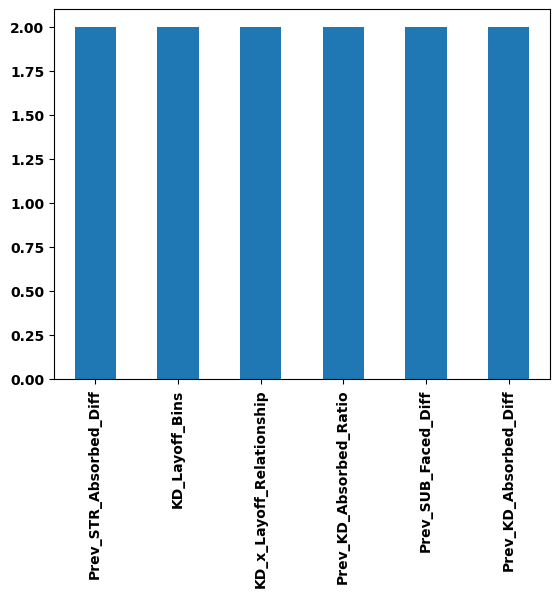

In [405]:
null_counts = train[cols].isna().sum()
null_counts = null_counts[null_counts > 0]
null_counts.plot(kind="bar")

In [407]:
train = train[cols]

<Axes: >

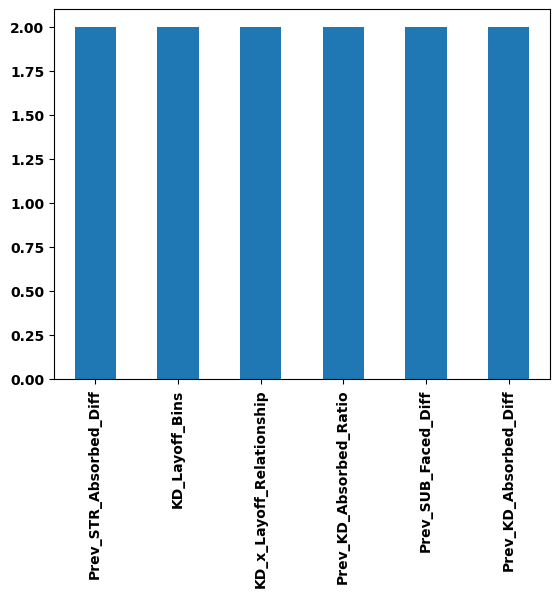

In [409]:
null_counts = train.isna().sum()
null_counts = null_counts[null_counts > 0]
null_counts.plot(kind="bar")

In [411]:
train.dropna(inplace=True)

In [448]:
cols1 = [x for x in cols if x != "Is_Winner_x"]

In [458]:
cols1

['Weight_class_lbs_205 lbs.',
 'Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler',
 'Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_BJJ_vs_BJJ',
 'Weight_class_lbs_185 lbs.',
 'Current_Win_Streak_Diff',
 'Weight_class_lbs_170 lbs.',
 'Prev_STR_Absorbed_Diff',
 'Fighter_Grappling_vs_OppTDD',
 'Overall_Stat_Interactions',
 'Str. Def:_Style',
 'Grappling_Ratio',
 'KD_Layoff_Bins',
 'TDD_vs_Opp_Grappling',
 'Str. Acc.:_Style',
 'Ape_Ratio_Comparison',
 'StrDef_vs_Opp_Str_Danger',
 'Overall_Stat_Interactions_Bin',
 'KD_x_Layoff_Relationship',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid',
 'Weight_class_lbs_265 lbs.',
 'Fighter_Grappling_vs_OppTDD_Bin',
 'SLpM:_Diff',
 'Weight_class_lbs_145 lbs.',
 'Days_Since_Last_Fight_Diff',
 'Fight_Style_Matchup_BJJ_vs_Balanced/Mid',
 'TD Avg.:_Diff',
 'Overall_Win_%_Diff',
 'Prev_KD_Absorbed_Ratio',
 'Striking_Ratio',
 'Fi

In [460]:
X_train = train[cols1]
y_train = train["Is_Winner_x"]

X_val = val[cols1]
y_val = val["Is_Winner_x"]

X_test = test[cols1]
y_test = test["Is_Winner_x"]

<Axes: >

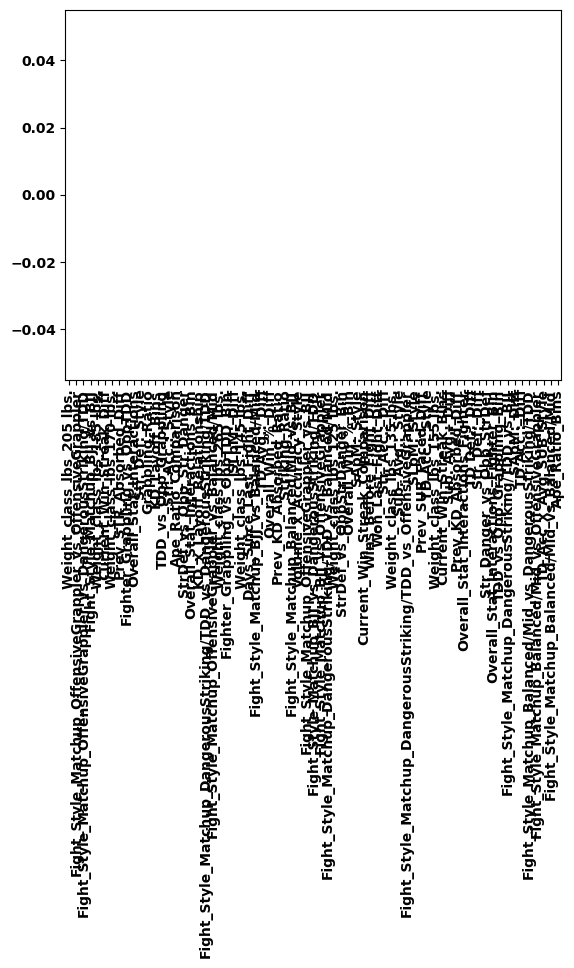

In [462]:
train_null = X_train.isna().sum()
# train_null = train_null[train_null > 0]
train_null.plot(kind = "bar")

In [463]:
# for col in X_train.columns:
#     X_train[f"shadow_{col}"] = X_train[col].sample(frac=1)

In [465]:
# !pip install boruta

In [466]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [471]:
estimator = RandomForestClassifier()

In [472]:
boruta = BorutaPy(estimator = estimator, n_estimators = "auto", max_iter = 200, verbose=2)
boruta.fit(X_train, y_train)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	69
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	69
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	69
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	69
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	69
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	69
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	69
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	14
Tentative: 	7
Rejected: 	48
Iteration: 	9 / 200
Confirmed: 	14
Tentative: 	7
Rejected: 	48
Iteration: 	10 / 200
Confirmed: 	14
Tentative: 	7
Rejected: 	48
Iteration: 	11 / 200
Confirmed: 	14
Tentative: 	7
Rejected: 	48
Iteration: 	12 / 200
Confirmed: 	15
Tentative: 	6
Rejected: 	48
Iteration: 	13 / 200
Confirmed: 	15
Tentative: 	6
Rejected: 	48
Iteration: 	14 / 200
Confirmed: 	15
Tentative: 	6
Rejected: 	48
Iteration: 	15 / 200
Confirmed: 	15
Tentative: 	6
Rejected: 	48
Iteration: 	16 / 200
Confirmed: 	15
Tentative: 	6
Reject

BorutaPy(estimator=RandomForestClassifier(n_estimators=58,
                                          random_state=RandomState(MT19937) at 0x22E53590240),
         max_iter=200, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x22E53590240, verbose=2)

In [486]:
important = list(X_train.columns[boruta.support_])
unsure = list(X_train.columns[boruta.support_weak_])

In [488]:
important

['Overall_Stat_Interactions',
 'Grappling_Ratio',
 'TDD_vs_Opp_Grappling',
 'Str. Acc.:_Style',
 'Ape_Ratio_Comparison',
 'StrDef_vs_Opp_Str_Danger',
 'SLpM:_Diff',
 'Striking_Ratio',
 'Volume_x_Accuracy_Style',
 'SApM:_Style',
 'SLpM:_Style',
 'TD Acc.:_Style',
 'Overall_Stat_Interactions_Fighter',
 'TD Def.:_Diff',
 'Str_Danger_vs_Opp_StrDef',
 'SApM:_Diff']

In [490]:
unsure

[]

In [492]:
weak = list(X_train.columns[~((boruta.support_) | (boruta.support_weak_))])

In [494]:
weak

['Weight_class_lbs_205 lbs.',
 'Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler',
 'Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_BJJ_vs_BJJ',
 'Weight_class_lbs_185 lbs.',
 'Current_Win_Streak_Diff',
 'Weight_class_lbs_170 lbs.',
 'Prev_STR_Absorbed_Diff',
 'Fighter_Grappling_vs_OppTDD',
 'Str. Def:_Style',
 'KD_Layoff_Bins',
 'Overall_Stat_Interactions_Bin',
 'KD_x_Layoff_Relationship',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid',
 'Weight_class_lbs_265 lbs.',
 'Fighter_Grappling_vs_OppTDD_Bin',
 'Weight_class_lbs_145 lbs.',
 'Days_Since_Last_Fight_Diff',
 'Fight_Style_Matchup_BJJ_vs_Balanced/Mid',
 'TD Avg.:_Diff',
 'Overall_Win_%_Diff',
 'Prev_KD_Absorbed_Ratio',
 'Fight_Style_Matchup_Balanced/Mid_vs_BJJ',
 'Fight_Style_Matchup_OffensiveGrappler_vs_BJJ',
 'Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_BJJ_vs_OffensiveGrap

In [496]:
cols_1 = important + unsure
# cols_1 = ["Prev_KD_Absorbed_Ratio"]
# cols_1 = ['StrDef_vs_Opp_Str_Danger',
#  'Grappling_Ratio',
#  'Overall_Stat_Interactions_Fighter',
#  'Striking_Ratio',
#  'Overall_Stat_Interactions',
#  'Prev_KD_Absorbed_Ratio',
#  'Str_Danger_vs_Opp_StrDef',
#  'Overall_Win_%_Diff', 'KD_x_Layoff_Relationship']

In [498]:
X_train = train[cols_1]
y_train = train["Is_Winner_x"]

X_val = val[cols_1]
y_val = val["Is_Winner_x"]

X_test = test[cols_1]
y_test = test["Is_Winner_x"]

In [500]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [502]:
def evaluate(actual, pred):
    print("Accuracy:", accuracy_score(actual, pred))
    print("F1 Score:", f1_score(actual, pred))
    print("\nClassification Report:\n", classification_report(actual, pred))
    print("\nConfusion Matrix:\n", confusion_matrix(actual, pred))

In [516]:
clf = RandomForestClassifier(n_estimators=1200, max_depth =12)
clf.fit(X_train, y_train)
val_preds = clf.predict(X_val)

In [517]:
evaluate(y_val, val_preds)

Accuracy: 0.672514619883041
F1 Score: 0.6744186046511628

Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.67      0.67       342
        True       0.67      0.68      0.67       342

    accuracy                           0.67       684
   macro avg       0.67      0.67      0.67       684
weighted avg       0.67      0.67      0.67       684


Confusion Matrix:
 [[228 114]
 [110 232]]


In [518]:
train_preds = clf.predict(X_train)
evaluate(y_train, train_preds)

Accuracy: 0.9295907660020987
F1 Score: 0.929627687467226

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.93      0.93      4765
        True       0.93      0.93      0.93      4765

    accuracy                           0.93      9530
   macro avg       0.93      0.93      0.93      9530
weighted avg       0.93      0.93      0.93      9530


Confusion Matrix:
 [[4427  338]
 [ 333 4432]]


In [308]:
y_val.value_counts()

Is_Winner_x
False    342
True     342
Name: count, dtype: int64

In [51]:
clf = RandomForestClassifier(max_depth = 9, max_features= None, min_samples_leaf =  15, min_samples_split = 12, n_estimators = 300)
clf.fit(X_train, y_train)
val_preds = clf.predict(X_val)

In [52]:
evaluate(y_val, val_preds)

Accuracy: 0.6915204678362573
F1 Score: 0.6591276252019386

Classification Report:
               precision    recall  f1-score   support

       False       0.66      0.79      0.72       342
        True       0.74      0.60      0.66       342

    accuracy                           0.69       684
   macro avg       0.70      0.69      0.69       684
weighted avg       0.70      0.69      0.69       684


Confusion Matrix:
 [[269  73]
 [138 204]]


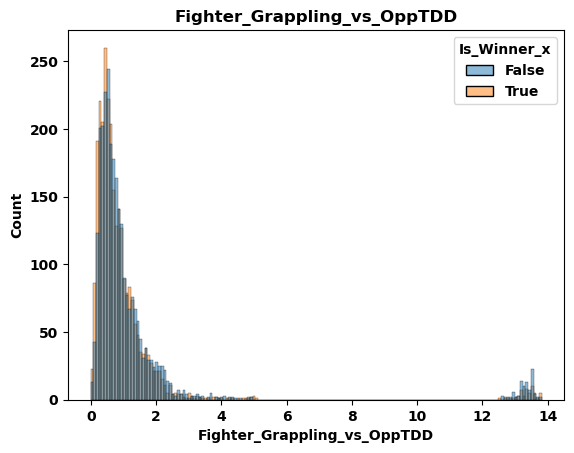

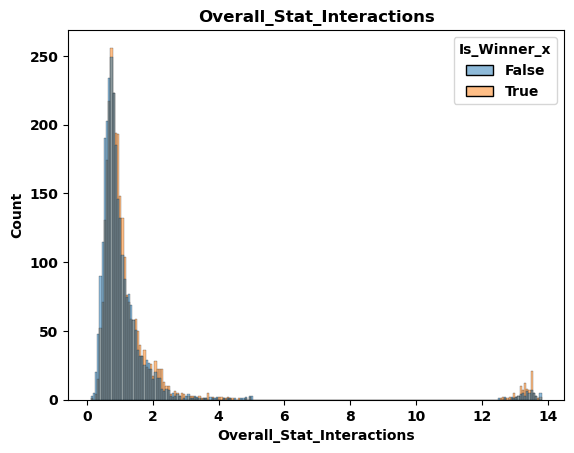

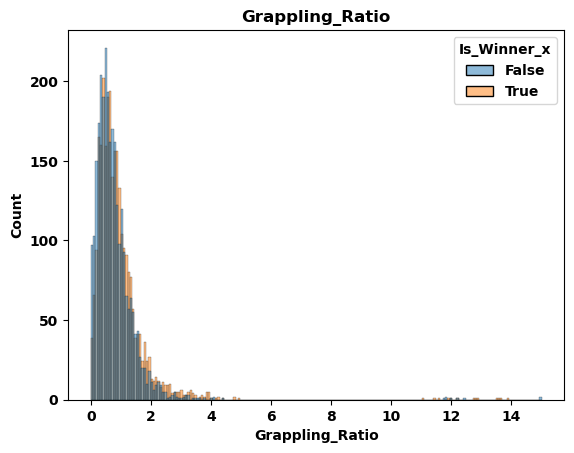

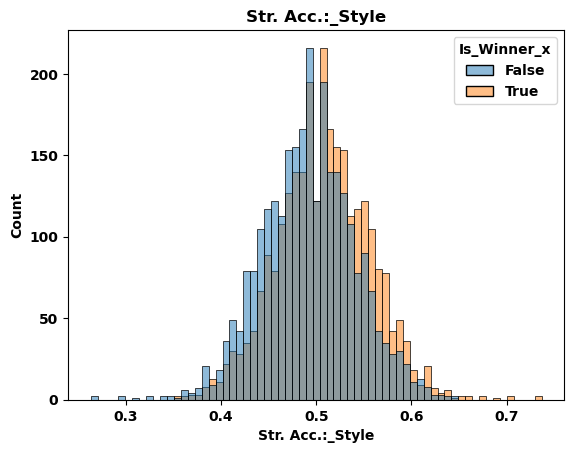

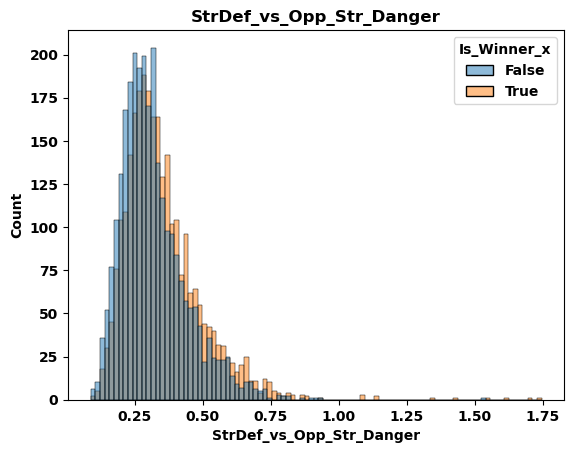

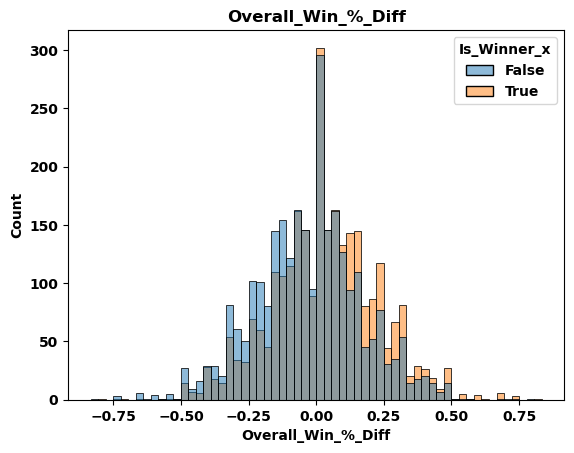

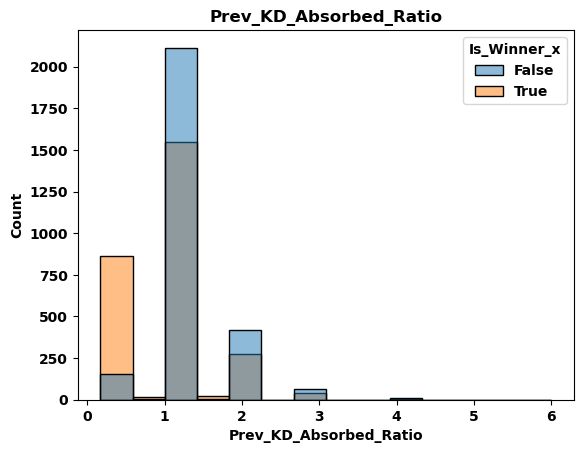

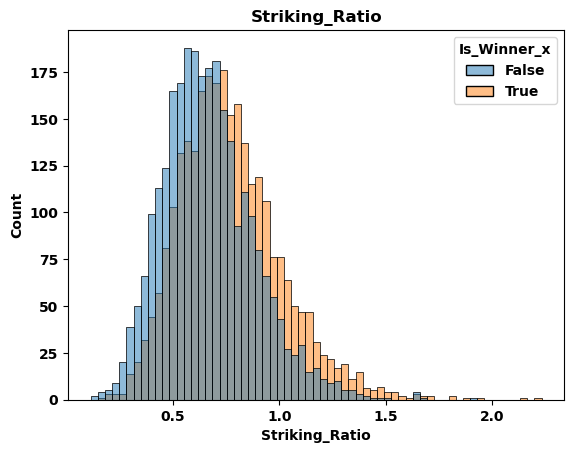

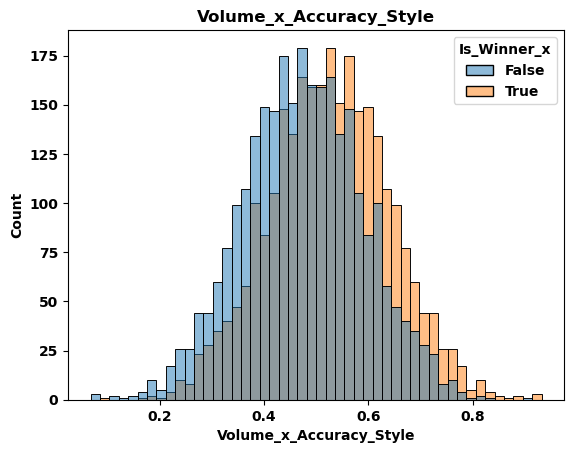

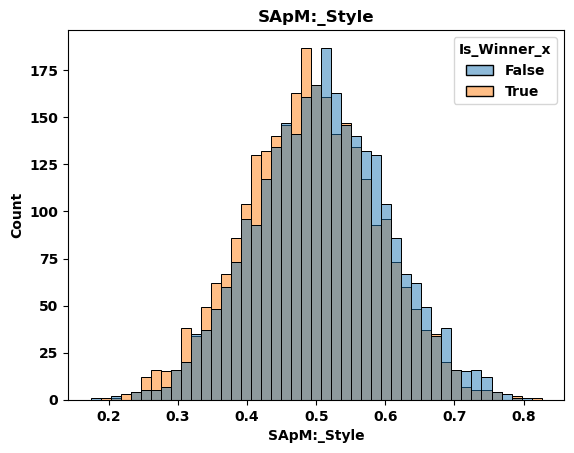

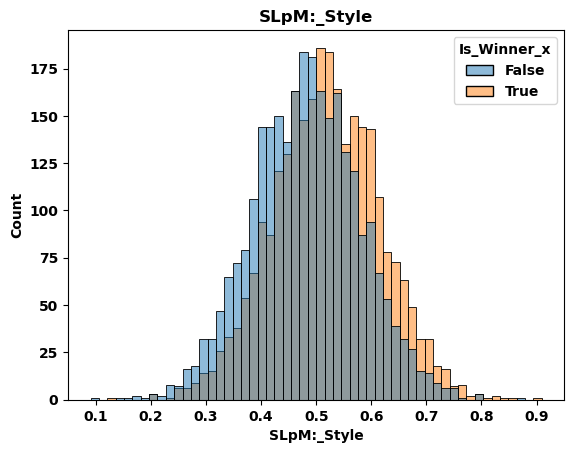

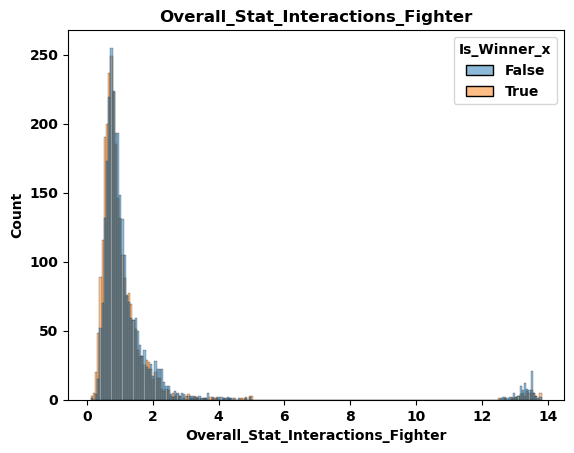

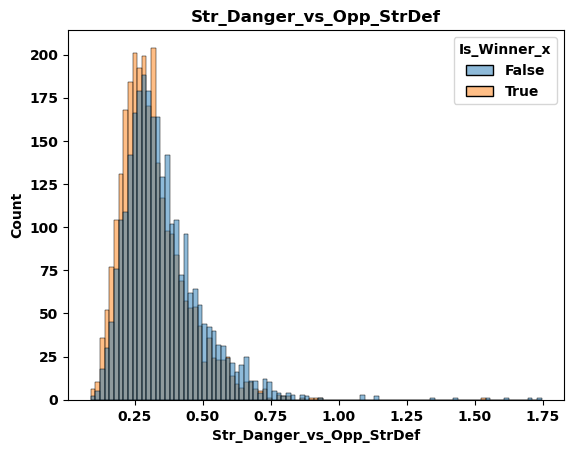

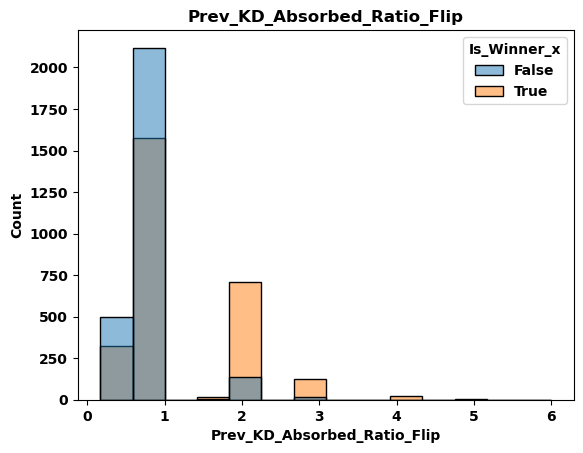

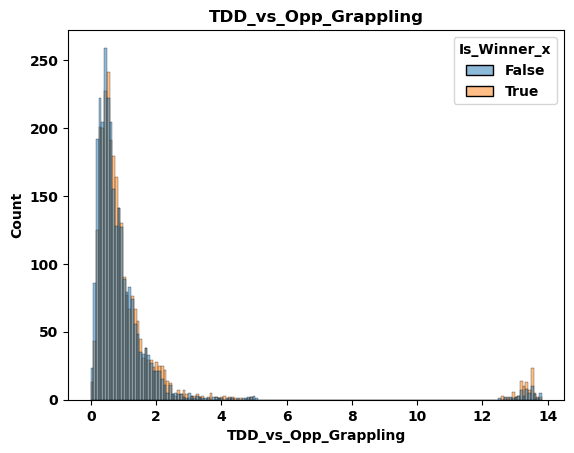

In [187]:
for i in cols_1:
    sns.histplot(data = train[cols_1 + ["Is_Winner_x"]], x = i, hue = "Is_Winner_x")
    plt.title(i)
    plt.show()
    